# Electromagnetic current

In the Standard Model of particle physics, the **electromagnetic current** is the conserved quantum current associated with the electromagnetic $U(1)$ gauge symmetry. 
It describes how charged fermion fields couple to the electromagnetic gauge field.

The electromagnetic current is defined as

$$
J^\mu_\gamma = \sum_f Q_f \, \bar{\psi}_f \gamma^\mu \psi_f ,
$$

where:
- the sum runs over all charged fermion fields $f$,
- $Q_f$ is the electric charge of fermion $f$ in units of the electron charge,
- $\psi_f$ is the fermion field,
- $\gamma^\mu$ are the Dirac gamma matrices.


By restricting to quark fields, which carry a fractional charge, e.g. for up and down quarks
$$
Q_u = \frac{2}{3}, \qquad Q_d = -\frac{1}{3}
$$
one can define the charged currents

$$
J^\mu_{+} = \bar{u} \gamma^\mu d , \qquad
J^\mu_{-} = \bar{d} \gamma^\mu u ,
$$


In [1]:
import giancarlo as gc

Qu = gc.Symbol('Q_u')
Qd = gc.Symbol('Q_d')
e = gc.Symbol('e')

u, ubar = gc.SpinorField('u')
d, dbar = gc.SpinorField('d')

# Camel case vs lower case ???

def Jgamma(x, mu):
    a, b = gc.default.var(), gc.default.var()
    up = Qu * ubar(x, a) * gc.DiracGamma(mu, a, b) * u(x, b)
    down = Qd * dbar(x, a) * gc.DiracGamma(mu, a, b) * d(x, b)
    return up + down

def Jn(x, mu):
    a, b = gc.default.var(), gc.default.var()
    return dbar(x, a) * gc.DiracGamma(mu, a, b) * u(x, b)

def Jp(x, mu):
    a, b = gc.default.var(), gc.default.var()
    return ubar(x, a) * gc.DiracGamma(mu, a, b) * d(x, b)

Jgamma('x', r'\mu')

( Q_u\,\bar{u}(x)\,G(\mu)\,G(\mu)\,u(x) + Q_d\,\bar{d}(x)\,G(\mu)\,G(\mu)\,d(x) )

# Hadronic-Vacuum-Polarization (in ISO QCD)

The HVP is defined by the product of two EM currents. From Wick's theorem we find several contributions.

In [2]:
gc.default.verbose['spin'] = True
hvp = Jgamma('x', r'\mu') * Jgamma('y', r'\nu')
hvp.wick()

( Q_u^2\,\gamma_{\mu}(x3, x4)\,S_u(x, x)(x4, x3)\,\gamma_{\nu}(x5, x6)\,S_u(y, y)(x6, x5) + -1\,Q_u^2\,\gamma_{\mu}(x3, x4)\,S_u(x, y)(x4, x5)\,\gamma_{\nu}(x5, x6)\,S_u(y, x)(x6, x3) + Q_d\,Q_u\,\gamma_{\mu}(x3, x4)\,S_u(x, x)(x4, x3)\,\gamma_{\nu}(x5, x6)\,S_d(y, y)(x6, x5) + Q_d\,Q_u\,\gamma_{\mu}(x3, x4)\,S_d(x, x)(x4, x3)\,\gamma_{\nu}(x5, x6)\,S_u(y, y)(x6, x5) + Q_d^2\,\gamma_{\mu}(x3, x4)\,S_d(x, x)(x4, x3)\,\gamma_{\nu}(x5, x6)\,S_d(y, y)(x6, x5) + -1\,Q_d^2\,\gamma_{\mu}(x3, x4)\,S_d(x, y)(x4, x5)\,\gamma_{\nu}(x5, x6)\,S_d(y, x)(x6, x3) )

In [4]:
gc.default.verbose['spin'] = False
hvp = Jgamma('x', r'\mu') * Jgamma('y', r'\nu')
for c in hvp.wick().trace(['spin']):
    gc.log(c)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Without any argument the `trace` method does not perform any operation

In [10]:
hvp.wick().trace()

( Q_u^2\,\gamma_{\mu}\,S_u(x, x)\,\gamma_{\nu}\,S_u(y, y) + -1\,Q_u^2\,\gamma_{\mu}\,S_u(x, y)\,\gamma_{\nu}\,S_u(y, x) + Q_d\,Q_u\,\gamma_{\mu}\,S_u(x, x)\,\gamma_{\nu}\,S_d(y, y) + Q_d\,Q_u\,\gamma_{\mu}\,S_d(x, x)\,\gamma_{\nu}\,S_u(y, y) + Q_d^2\,\gamma_{\mu}\,S_d(x, x)\,\gamma_{\nu}\,S_d(y, y) + -1\,Q_d^2\,\gamma_{\mu}\,S_d(x, y)\,\gamma_{\nu}\,S_d(y, x) )

By imposing the isosymmetric limit of QCD, namely the equivalence between up and down quark propagators, we can simplify our expression and collect similar terms. This can be done at the level of the propagators or traces. The `trace` method and the `replace` method commute.

In [5]:
hvp.wick().replace({'S_u': 'S', 'S_d': 'S'}).simplify()

( ( Q_u^2 + 2\,Q_d\,Q_u + Q_d^2 )\,\gamma_{\mu}\,S(x, x)\,\gamma_{\nu}\,S(y, y) + ( -1\,Q_u^2 + -1\,Q_d^2 )\,\gamma_{\mu}\,S(x, y)\,\gamma_{\nu}\,S(y, x) )

In [7]:
hvp.wick().replace({'S_u': 'S', 'S_d': 'S'}).trace(['spin']).simplify()

( ( Q_u^2 + 2\,Q_d\,Q_u + Q_d^2 )\,\mathrm{Tr}_\mathrm{spin} [ \gamma_{\mu}\,S(x, x) ]\,\mathrm{Tr}_\mathrm{spin} [ \gamma_{\nu}\,S(y, y) ] + ( -1\,Q_u^2 + -1\,Q_d^2 )\,\mathrm{Tr}_\mathrm{spin} [ \gamma_{\mu}\,S(x, y)\,\gamma_{\nu}\,S(y, x) ] )

In [9]:
hvp_simp = hvp.wick().trace(['spin']).replace({'S_u': 'S', 'S_d': 'S'}).simplify()
hvp_simp

( ( Q_u^2 + 2\,Q_d\,Q_u + Q_d^2 )\,\mathrm{Tr}_\mathrm{spin} [ \gamma_{\mu}\,S(x, x) ]\,\mathrm{Tr}_\mathrm{spin} [ \gamma_{\nu}\,S(y, y) ] + ( -1\,Q_u^2 + -1\,Q_d^2 )\,\mathrm{Tr}_\mathrm{spin} [ \gamma_{\mu}\,S(x, y)\,\gamma_{\nu}\,S(y, x) ] )

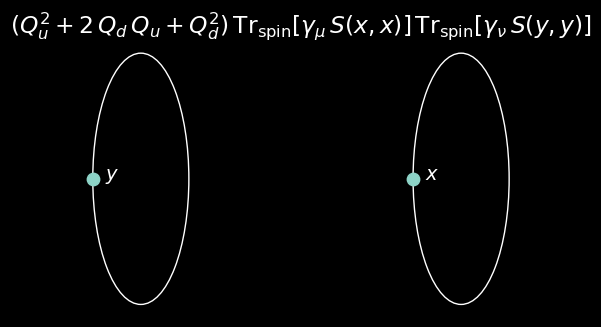

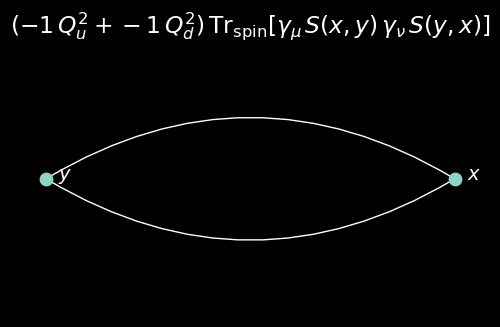

In [4]:
gc.PlotStyle.style = 'dark_background'
hvp_simp.draw()

# Isospin components

By defining the appropriate linear combinations we can also isolate the different isospin components.
The EM current can be separated in two parts

$$
J^\mu_\gamma = J^\mu_{(0)} + J^\mu_{(1)}
$$

corresponding to

$$
J^\mu_{(0)} = Q_+ \, \bar q \gamma^\mu q
= Q_+ \left( \bar u \gamma^\mu u + \bar d \gamma^\mu d \right)
$$

and

$$
J^\mu_{(1)} = Q_- \, \bar q \gamma^\mu \tau_3 q
= Q_- \left( \bar u \gamma^\mu u - \bar d \gamma^\mu d \right)
$$

Notice that we used the following definitions
$$
Q_+ \equiv \frac{Q_u + Q_d}{2}, \qquad
Q_- \equiv \frac{Q_u - Q_d}{2}
$$



In [5]:
Qp = gc.Symbol('Q_+')
Qm = gc.Symbol('Q_-')

def Jgamma_iso(x, mu, i=None):
    a = [gc.default.var()]*4
    up = ubar(x,a[0]) * gc.DiracGamma(mu,a[0],a[1]) * u(x,a[1])
    down = dbar(x,a[2]) * gc.DiracGamma(mu,a[2], a[3]) * d(x,a[3])
    if i==0:
        return gc.CNumber(1,2) * Qp * (up+down)
    elif i==1:
        return gc.CNumber(1,2) * Qm * (up - down)
    return gc.CNumber(1,2) * Qp * (up+down) + (gc.CNumber(1,2) * Qm * (up - down))

Jgamma_iso('x', 'mu')

( \frac{1}{2}\,Q_+\,\bar{u}(x)\,G(mu)\,G(mu)\,u(x) + \frac{1}{2}\,Q_+\,\bar{d}(x)\,G(mu)\,G(mu)\,d(x) + \frac{1}{2}\,Q_-\,\bar{u}(x)\,G(mu)\,G(mu)\,u(x) + \frac{-1}{2}\,Q_-\,\bar{d}(x)\,G(mu)\,G(mu)\,d(x) )

In [6]:
hvp = Jgamma_iso('x', r'\mu') * Jgamma_iso('y', r'\nu')
for c in hvp.wick().trace(['spin']).replace({'S_u': 'S', 'S_d': 'S'}).simplify():
    gc.log(c)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

# Strong isospin-breaking correction

In [7]:
dmu = gc.Symbol(r'\Delta_{m_u}')
dmd = gc.Symbol(r'\Delta_{m_d}')
dmp = gc.Symbol(r'\Delta_{m_+}')
dmm = gc.Symbol(r'\Delta_{m_-}')

def Scalar(x):
    a, b = gc.default.var(), gc.default.var()
    # return dmu * ubar(x, a) * u(x, a) + dmd * dbar(x, b) * d(x, b)
    return gc.CNumber(1,2) * dmp * (ubar(x,a) * u(x,a) + dbar(x,b) * d(x,b)) + gc.CNumber(1,2) * dmm * (ubar(x,a) * u(x,a) - dbar(x,b) * d(x,b))

hvp_sib = Jgamma_iso('x', r'\mu') * Scalar('z') * Jgamma_iso('y', r'\nu')
hvp_sib_s = hvp_sib.wick(trace_indices=['spin']).replace({'S_u': 'S', 'S_d': 'S'}).simplify()
hvp_sib_s

( ( -1\,Q_+^2\,\Delta_{m_+} )\,\mathrm{Tr}_\mathrm{spin} [ \gamma_{\mu}\,S(x, x) ]\,\mathrm{Tr}_\mathrm{spin} [ S(z, z) ]\,\mathrm{Tr}_\mathrm{spin} [ \gamma_{\nu}\,S(y, y) ] + ( \frac{1}{2}\,Q_+^2\,\Delta_{m_+} + \frac{1}{2}\,Q_+\,Q_-\,\Delta_{m_-} )\,\mathrm{Tr}_\mathrm{spin} [ \gamma_{\mu}\,S(x, x) ]\,\mathrm{Tr}_\mathrm{spin} [ S(z, y)\,\gamma_{\nu}\,S(y, z) ] + ( \frac{1}{2}\,Q_+^2\,\Delta_{m_+} + \frac{1}{2}\,Q_+\,Q_-\,\Delta_{m_-} )\,\mathrm{Tr}_\mathrm{spin} [ \gamma_{\mu}\,S(x, z)\,S(z, x) ]\,\mathrm{Tr}_\mathrm{spin} [ \gamma_{\nu}\,S(y, y) ] + ( \frac{-1}{4}\,Q_+^2\,\Delta_{m_+} + \frac{-1}{2}\,Q_+\,Q_-\,\Delta_{m_-} + \frac{-1}{4}\,Q_-^2\,\Delta_{m_+} )\,\mathrm{Tr}_\mathrm{spin} [ \gamma_{\mu}\,S(x, z)\,S(z, y)\,\gamma_{\nu}\,S(y, x) ] + ( \frac{-1}{4}\,Q_+^2\,\Delta_{m_+} + \frac{-1}{2}\,Q_+\,Q_-\,\Delta_{m_-} + \frac{-1}{4}\,Q_-^2\,\Delta_{m_+} )\,\mathrm{Tr}_\mathrm{spin} [ \gamma_{\mu}\,S(x, y)\,\gamma_{\nu}\,S(y, z)\,S(z, x) ] + ( \frac{1}{2}\,Q_+^2\,\Delta_{m_+} + \f

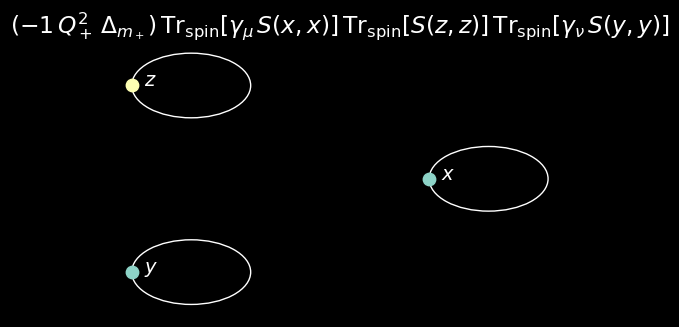

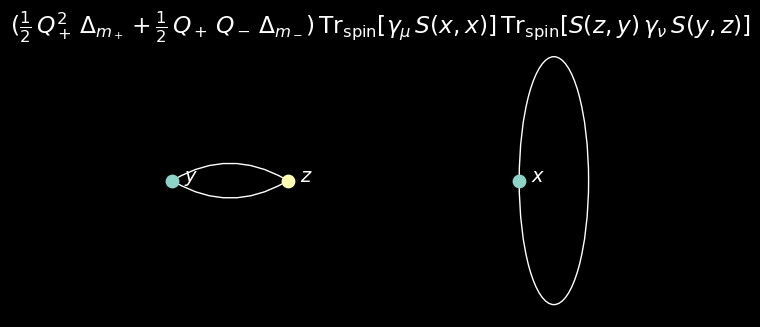

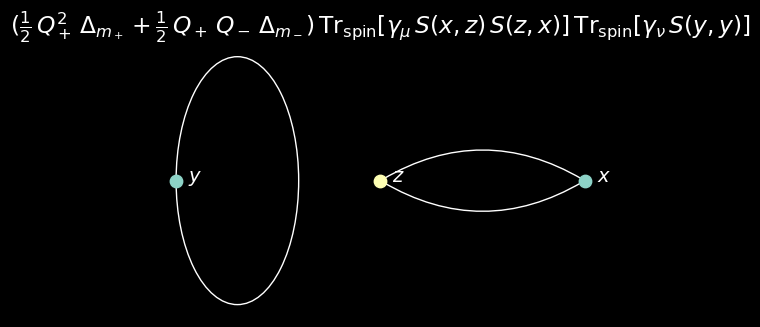

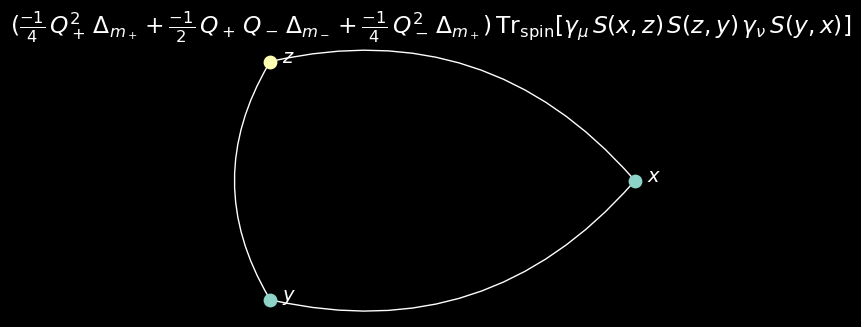

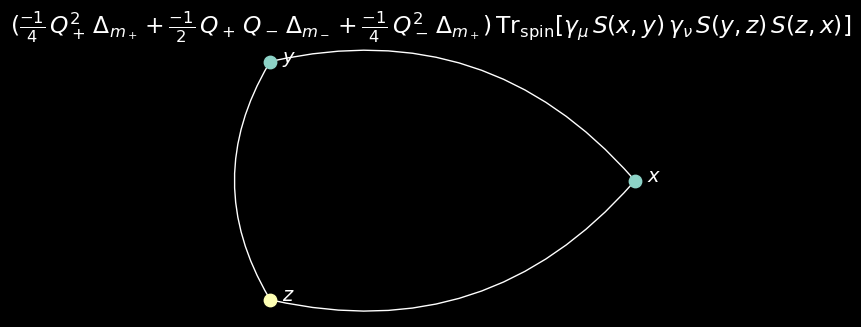

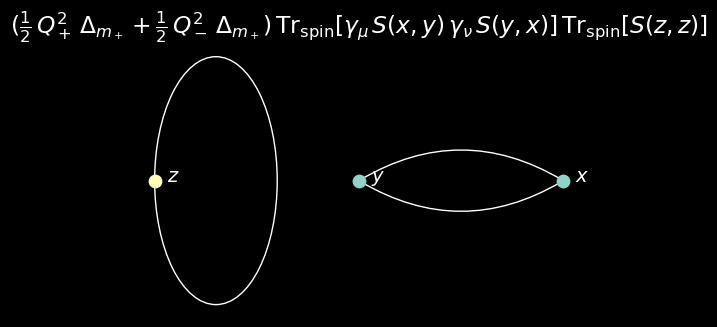

In [8]:
gc.PlotStyle.points['z'] = gc.PlotStyle.point(color='C1')
hvp_sib_s.draw()

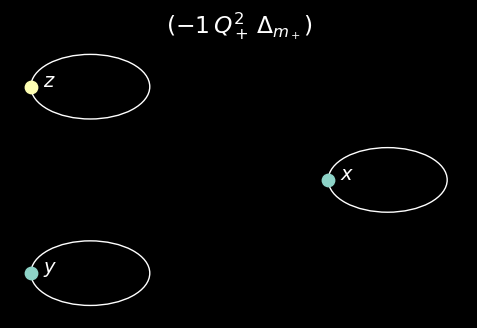

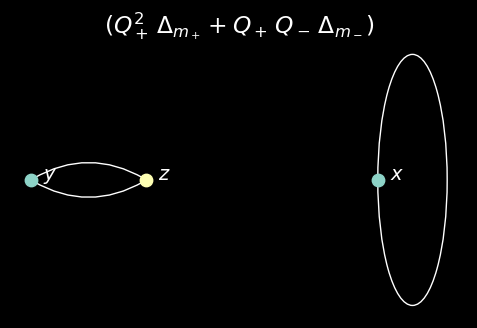

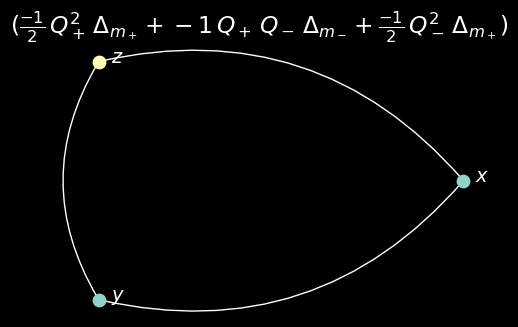

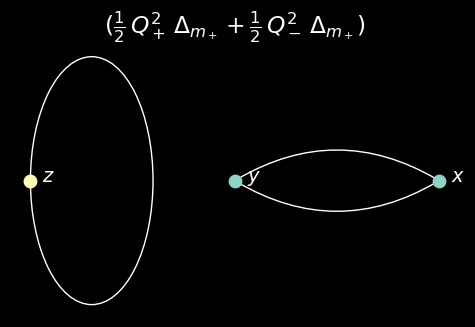

In [9]:
t = gc.Topologies(hvp_sib_s, (0,), (1,2), (3,4), (5,))
t.draw()